# Low-mass X-ray Binaries  (LMXBs)

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––-––––––––––––––––––––––

**supervisors:**
**Giuliano Iorio and Michela Mapelli**


#### Group : 17

**The Description of the Problem**




X-ray binaries are binary systems in which a compact object (black hole or neutron star) accretes mass from a stellar companion. In particular LOW-MASS X-ray binary systems (hereafter, LMXBs) are X-ray binaries in which the mass of the compact object is larger than the mass of the companion star. LMXBs have been widely studied in the Galactic field and in old stellar clusters, like globular clusters. In contrast, LMXBs have been completely neglected in young star clusters (i.e., self-gravitating systems of stars with an age << 100 Myr). This lack of studies is partially motivated by the dearth of observations of X-ray binaries in young star clusters, observations which are difficult to perform for several reasons. In the last few years, the available observational facilities have made it possible to study X-ray binaries even in young star clusters, prompting the interest of the astrophysics community.
In this project, we will analyze a set of simulations of massive binary stars, with the age and metallicity typical of young star clusters in the Milky Way. 

**The Goal of the Project**

The goal of the project is to understand the population of low-mass X-ray binary
systems (LMXBs) in young star clusters. In this project, we analyze a set of simulations of massive binary systems, in order to assess the impact of different physical parameters (common envelope efficiency, metallicity, mass of the progenitor stars) on the distribution of LMXBs.
The simulations have been obtained with the SEVN population-synthesis code. We ran a grid of simulations varying the metallicity of the stars (Z=0.01, 0.014, 0.016, 0.02) and the efficiency parameter for the common envelope evolution (alpha=0.5, 1, 3) for a total of 12 simulations (each simulation contains 4e6 binaries)




**Methodology** 
In this part we focused on the features of the data as a whole. We plot some physical parameters of the said LXMBs and try to analyze the links of those parameters to the formations of the LXMBs

**The code**

Here we access the files with the filtered data. This particular notebook has been worked on locally. So, one should be carefull to change the path to the folders containing the csv files when running it.

In [177]:
import matplotlib.pyplot as plt
import pandas as pd 
import os
import statistics as st
import re
import numpy as np
import math

In [178]:
path_0 = "/Users/mariam/Desktop/LCP2/project/F_data/" #change path according to machine  
dirs_0 = os.listdir(path_0)

In [179]:
#read files 

files0 = list() #initial data
files1 = list() #filtered data
paths_1 = list() #paths to the folders with the data
dirs_01 = list() #paths to the inside of the folders with the data

for i,f in enumerate(dirs_0):
    if dirs_0[i].startswith('F'):
        paths_1.append(path_0+dirs_0[i])
    
    
for j,d in enumerate(paths_1):   
    if os.path.isdir(paths_1[j]):
        dirs_01 = os.listdir(paths_1[j])
        for dirs01 in dirs_01: 
            if dirs01.endswith(".csv"):
                if dirs01.startswith('F'):
                    files1.append(dirs01)
                elif dirs01.startswith("init"):
                    files0.append(dirs01)
                    
    

In [195]:
#get metalicities and alphas in a list correspondant to each folder with the right order which makes it easier to plot
metalicities = list()
alphas = list()
for f in files1:
    part0 = f.partition('FZ')
    part1 = part0[2].partition('A')
    part2=part1[2].partition(".csv")
    m = float(part1[0])
    metalicities.append(m)
    a = float(part2[0])
    alphas.append(a)
print(metalicities)
print(len(metalicities))
print(alphas)
print(len(alphas))

[0.02, 0.01, 0.016, 0.014, 0.016, 0.014, 0.02, 0.01, 0.016, 0.02, 0.014, 0.01]
12
[3.0, 3.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 3.0, 0.5, 3.0, 0.5]
12


In [181]:
# metallicities = [0.01, 0.02, 0.014, 0.016]
# alphas = [0.5, 1, 3]

In [182]:
dfs = [] #list with 12 filtered dataframes 
#create a list of dataframes from all the folders 
for i in range(0,len(paths_1)):
    df = pd.read_csv(paths_1[i]+'/'+files1[i])
    dfs.append(df)
dfs_1= pd.concat(dfs)
dfs_1 #dataframe with all the data joined together

,Unnamed: 0,ID,name,Mass_0,MHE_0,MCO_0,Radius_0,RHE_0,RCO_0,Luminosity_0,...,Phase_1,RemnantType_1,Zams_1,Semimajor,Period,Eccentricity,RL0,RL1,BWorldtime,BEvent
0,122,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.019889,...,1,0,2.0,1.051164,0.000311,6.100155e-17,0.753242,0.110132,10.900850,-1
1,78,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.276395,...,1,0,2.0,0.969121,0.000266,6.100860e-17,0.571129,0.192206,10.122550,-1
2,77,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.291220,...,1,0,2.0,0.964956,0.000263,6.100896e-17,0.565150,0.194038,10.115190,-1
3,76,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.306666,...,1,0,2.0,0.960629,0.000261,6.100935e-17,0.559080,0.195843,10.108100,-1
4,75,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.322742,...,1,0,2.0,0.956134,0.000259,6.100977e-17,0.552920,0.197617,10.101270,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,1467,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,2.414411,...,1,0,2.0,1.284631,0.000278,2.954164e-13,0.488873,0.484676,9.453027,-1
3942,1471,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,1.941059,...,1,0,2.0,1.422566,0.000338,2.931839e-13,0.563872,0.514563,9.464738,-1
3943,1470,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,2.057918,...,1,0,2.0,1.387866,0.000323,2.936428e-13,0.544598,0.507392,9.461474,-1
3944,1469,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,2.176130,...,1,0,2.0,1.353283,0.000307,2.941621e-13,0.525665,0.500010,9.458444,-1


Now that we have a dataframe which contains the whole data concantanated together, we can analyze the physical parameters of the dataset as a whole. 

**1. Mass distribution**

For LMXBs the compact object has larger mass than the companion star. Since in the first part of the project we already filtered through the data, in this dataset we obtain systems only where the mentioned condition is already satisfied.

In the code below we study the mass distribution of the dataset. 

In [494]:
mean_m0 = st.mean(dfs_1['Mass_0'])
mean_m1 = st.mean(dfs_1['Mass_1'])

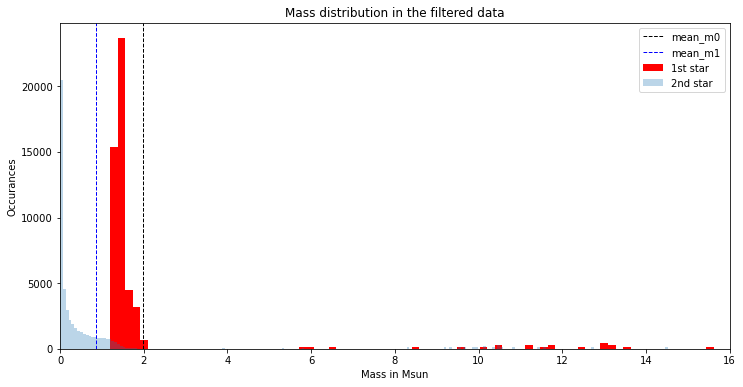

In [498]:
plt.figure(figsize=(12,6))
plt.hist(dfs_1['Mass_0'],label = '1st star', color = 'red', bins = 80)
plt.hist(dfs_1['Mass_1'],label = '2nd star',alpha = 0.3,bins=nbins)
plt.axvline(mean_m0, color='k', linestyle='dashed', linewidth=1,label = 'mean_m0')
plt.axvline(mean_m1, color='b', linestyle='dashed', linewidth=1,label = 'mean_m1')
plt.xlabel("Mass in Msun")
plt.ylabel("Occurances")
plt.xlim(0,16)
plt.title("Mass distribution in the filtered data")
plt.legend(loc='upper right')

As shown in the graph for most of the data is centered around 0-2 Msun region with small parts of it being much massive. What is interesting here to observe, is that even tho the 2nd star which in our case would be the compact object is more massive, the mean mass of the all values of the companion stars is bigger than that of the compact objects. This means that the distribution of the masses we observe very heavy stars as a companion while them still being less massive than the compact objects.

In [489]:
m0_means = list() #list of the means for the companion star
m1_means = list() #list of the means for the compact objects
m0_modes = list() #list of the modes for the companion star
m1_modes = list() #list of the modes for the compact object
for d in dfs:
    mean0 = st.mean(d['Mass_0'])
    m0_means.append(mean0)
    mean1 = st.mean(d['Mass_1'])
    m1_means.append(mean1)
    mode0 = st.mode(d['Mass_0'])
    m0_modes.append(mode0)
    mode1 = st.mode(d['Mass_1'])
    m1_modes.append(mode1)



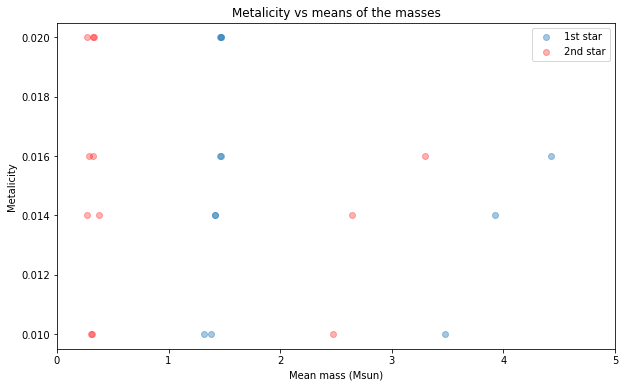

In [526]:
plt.figure(figsize=(10,6))
plt.scatter(m0_means,metalicities,label = "1st star",alpha= 0.4)
plt.scatter(m1_means,metalicities,label = "2nd star",color = 'red',alpha = 0.3)
plt.xlim(0,5)
plt.xlabel("Mean mass (Msun)")
plt.ylabel("Metalicity")
plt.title("Metalicity vs means of the masses")
plt.legend(loc = "best")
plt.show()

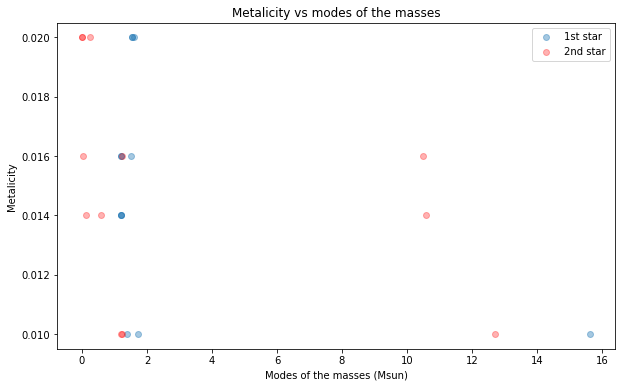

In [525]:
plt.figure(figsize=(10,6))
plt.scatter(m0_modes, metalicities, label= '1st star',alpha = 0.4)
plt.scatter(m1_modes,metalicities,label = "2nd star",color = 'red',alpha = 0.3)
plt.xlabel("Modes of the masses (Msun)")
plt.ylabel("Metalicity")
plt.title("Metalicity vs modes of the masses")
plt.legend(loc = "best")

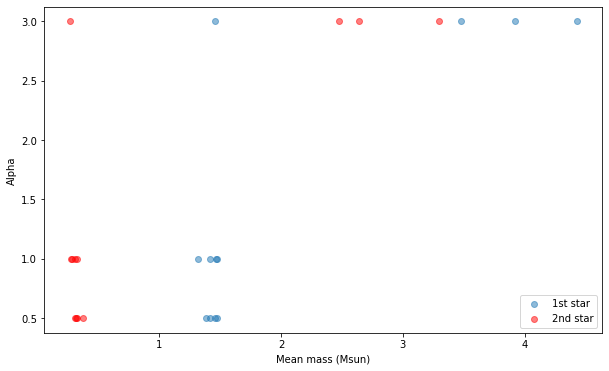

In [524]:
plt.figure(figsize=(10,6))
plt.scatter(m0_means,alphas,label = "1st star",alpha = 0.5)
plt.scatter(m1_means,alphas,label = "2nd star",alpha = 0.5,color = 'red')
plt.xlabel("Mean mass (Msun)")
plt.ylabel("Alpha")
plt.legend(loc = "best")
plt.show()

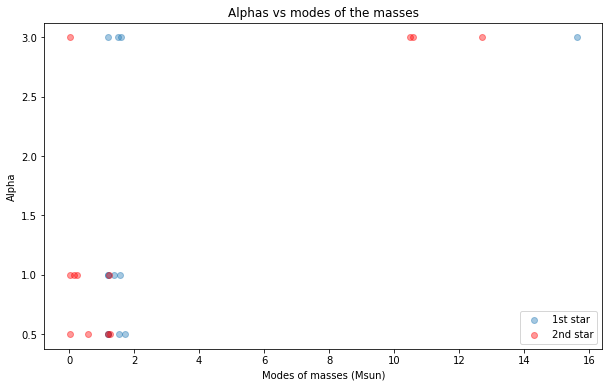

In [520]:
plt.figure(figsize=(10,6))
plt.scatter(m0_modes,alphas,label = "1st star",alpha = 0.4)
plt.scatter(m1_modes,alphas,label = "2nd star",alpha = 0.4,color = 'red')
plt.xlabel("Modes of masses (Msun)")
plt.ylabel("Alpha")
plt.title("Alphas vs modes of the masses")
plt.legend(loc = "best")
plt.show()

As can be seen from the plots while the mean masses of the masses for different metalicities and alphas are more or less uniformly distributed, the modes are not. This can be an explaination of the mean masses trend that we observed for the whole dataset. 

In [213]:
# phases = pd.DataFrame()
# for d in dfs:
#     phases = phases.append(d['Phase_1'])

# phases = phases.fillna(55) #the lengths of the files differ that's why we get NaN, replace Nan with 55(random big number)
# phases = phases.T
# phases

**2. Phase distribution** 
In the code below we analyze the phase distribution of the dataset. 

The SEVN stellar phases are the following


• Phase 1: Zero age main sequence, the star is burning Hydrogen in the core

• Phase 2: Terminal main sequence, the stars has developed an He-core

• Phase 3: H-shell burning, the star is burning hydrogen in a thin shell around the He-core

• Phase 4: Core-He burning, the star is burning He in the core

• Phase 5: Terminal Core-He burning, the star has developed a Carbon-Oxygen (CO) core
  
  
• Phase 6: He-shell burning, the star is burning He in a thin shell arounce the CO core

• Phase 7: Remnant, final product of the stellar life, it could be a black hole, a neutron star or
a white dwarf 

As we are interested in the systems where one of the stars is a neutron star, white dwarf or a black hole and the other is either an electron capture neuron star (burning He in the core), core collapse neutron star(has developed a CO core) or is burning He in a this shell arounce the CO core, we would naturally get the phase distribution according to that.


In [253]:
mean_phase0 = st.mean(dfs_1['Phase_0'])
var_phase0 = st.variance(dfs_1['Phase_0'])
print("The mean of the phases for the 1st star is:",mean_phase0)  ###not meaningfull
#print("The variance of the phases is:", var_phase)

The mean of the phases for the 1st star is: 7


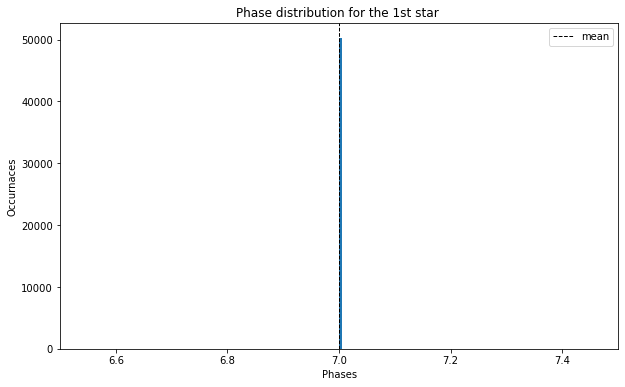

In [247]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Phase_0'],bins = nbins)
plt.xlim(6.5,7.5) 
plt.ylabel("Occurnaces")
plt.xlabel("Phases")
plt.title("Phase distribution for the 1st star ")
plt.axvline(mean_phase0, color='k', linestyle='dashed', linewidth=1,label = 'mean')
# plt.axvline(mean_phase + var_phase,color = 'r', linestyle='dashed', linewidth=1,label = 'variance')
# plt.axvline(mean_phase - var_phase,color = 'r', linestyle='dashed', linewidth=1 )
plt.legend(loc= 'best')
plt.show()




The plots and the mean value of the phase are there just to show that our filter worked in the first part of the project. 

In [543]:
mean_rad_0 =  st.mean(dfs_1['Radius_0'])
print("The mean of the radii for the 1st star is ", mean_rad_0,'Rsun')

The mean of the radii for the 1st star is  1.758686014376456e-05 Rsun


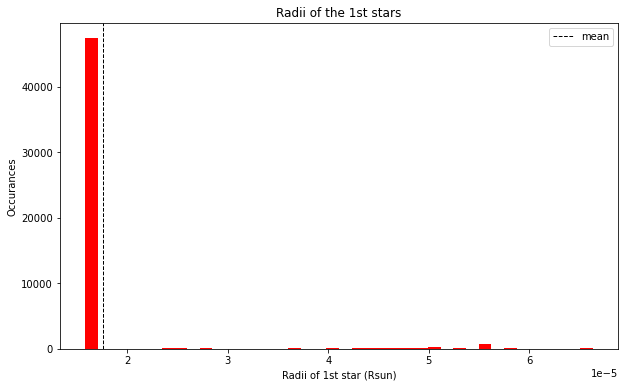

In [515]:
#phase vs radius 
plt.figure(figsize=(10,6))
plt.hist(dfs_1["Radius_0"],bins = 40,color = 'red')
plt.axvline(mean_rad_0,color='k', linestyle='dashed', linewidth=1,label = 'mean' )
plt.xlabel("Radii of 1st star (Rsun)")
plt.ylabel("Occurances")
plt.title("Radii of the 1st stars")
plt.legend(loc='best')
plt.show()

The radii of the 1st stars are quite small. This confirms the fact that 1st star is the less massive one, therefore the companion star.

In [542]:
mean_phase_1 = st.mean(dfs_1['Phase_1'])
var_phase_1 = st.variance(dfs_1['Phase_1'])
print("The mean of the phases for the 2nd star is",mean_phase_1)  
#print("The variance of the phases is:", var_phase)

The mean of the phases for the 2nd star is 1.22160052567651


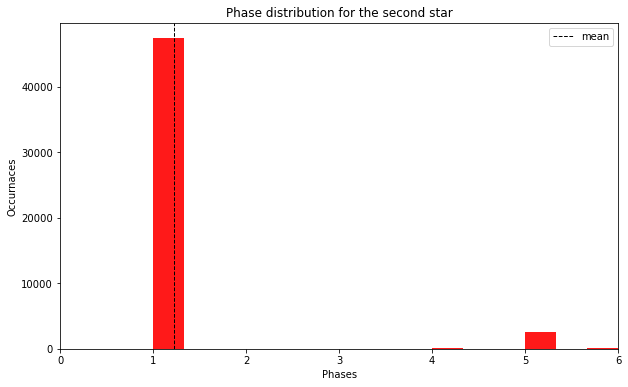

In [514]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Phase_1'],bins = 15,alpha = 0.9,color = 'red')
plt.xlim(0,6) 
plt.ylabel("Occurnaces")
plt.xlabel("Phases")
plt.title("Phase distribution for the second star")
plt.axvline(mean_phase_1, color='k', linestyle='dashed', linewidth=1,label = 'mean')
# plt.axvline(mean_phase + var_phase,color = 'r', linestyle='dashed', linewidth=1,label = 'variance')
# plt.axvline(mean_phase - var_phase,color = 'r', linestyle='dashed', linewidth=1 )
plt.legend(loc= 'best')
plt.show()


For the 2nd star we mostly have phase 1, an adequate amount of phase 5 and a small amount of phase 4 and 6. 
Given the meaning of the phases mentioned above, we found interesting to analyze the ratio of the H, He and CO core radii for each phase. 



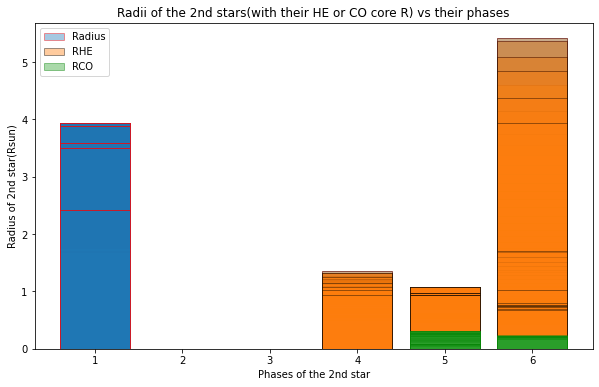

In [541]:
#phase vs radius 
plt.figure(figsize=(10,6))
plt.bar(dfs_1["Phase_1"],dfs_1["Radius_1"],alpha = 0.4,edgecolor="red",label= "Radius")
plt.bar(dfs_1["Phase_1"],dfs_1["RHE_1"],alpha = 0.4,edgecolor='black',label = "RHE")
plt.bar(dfs_1["Phase_1"],dfs_1["RCO_1"],alpha = 0.4,edgecolor='green',label = "RCO")

plt.ylabel("Radius of 2nd star(Rsun)")
plt.xlabel("Phases of the 2nd star")
plt.title("Radii of the 2nd stars(with their HE or CO core R) vs their phases")
plt.legend(loc='best')
plt.show()

The plot above shows that for the stars in phase 1, the core is fully consisting of H. 
For the stars in phase 4,5,6 the He radius prevails having a CO closer to the core in phase 5,6 with He around it. The biggest stars in our data are the ones in phase 6.

**3. Semimajor axis and eccentricity distribution**

If final semi-major axis is smaller than the sum of core radii  then the cores merge. 

In [540]:
mean_semimaj = st.mean(dfs_1['Semimajor'])
var_semimaj = st.variance(dfs_1['Semimajor'])
mean_sum_radii= st.mean(dfs_1["Radius_0"]+dfs_1["Radius_1"])
print("The mean of the semimajor axes is",mean_semimaj,"Rsun")
print("The mean of the sums of the radii is", mean_sum_radii, "Rsun")
#print("The variance of the semimajor axes is:", var_semimaj)



The mean of the semimajor axes is 1.0185191232293265 Rsun
The mean of the sums of the radii is 2.773616195280924 Rsun


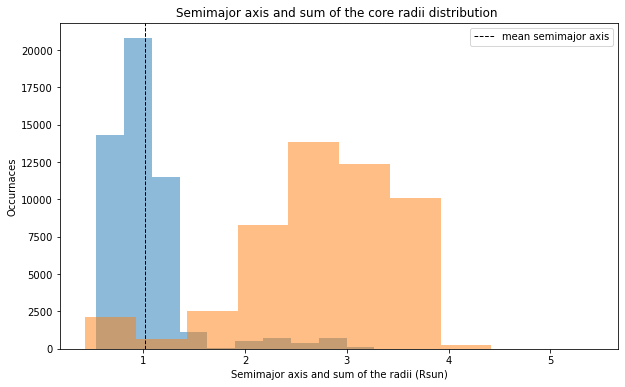

In [535]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Semimajor'],alpha = 0.5)
plt.hist(dfs_1["Radius_0"]+dfs_1["Radius_1"],alpha = 0.5)
plt.xlabel("Semimajor axis and sum of the radii (Rsun)")
plt.ylabel("Occurnaces")
plt.title("Semimajor axis and sum of the core radii distribution ")
plt.axvline(mean_semimaj, color='k', linestyle='dashed', linewidth=1,label = 'mean semimajor axis')
# plt.axvline(mean_semimaj+var_semimaj,color = 'r', linestyle='dashed', linewidth=1, label = 'variance')
# plt.axvline(mean_semimaj-var_semimaj,color = 'r', linestyle='dashed', linewidth=1)
plt.legend(loc= 'best')
plt.show()

The plot shows that the semimajor axes have smaller values than the sum of the radii which is centered more around the 2-4 Msun.

**4. Eccentricity distribution**

The eccentricity is given by the following formula:

$ {e} = \sqrt{1 + \frac {2E{L^2}}{\mu^3 {G^2}({m}_1 + {m}_2)^2}}$


In [539]:
mean_ecc = st.mean(dfs_1['Eccentricity'])
#var_ecc = st.variance(dfs_1['Eccentricity'])
print("The mean of the eccentricities is",mean_ecc,"Rsun")
#print("The variance of the eccentricities is:", var_ecc)

The mean of the eccentricities is 0.00035906496981674625 Rsun


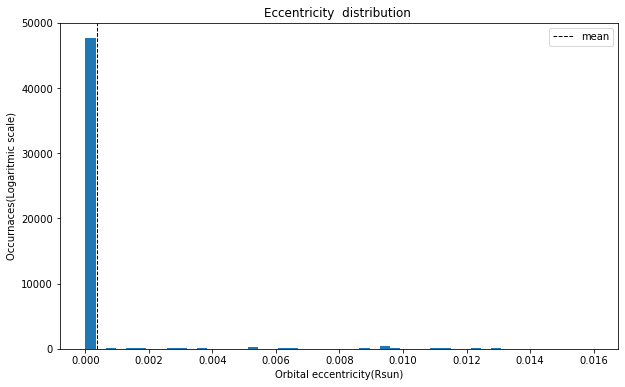

In [537]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Eccentricity'],bins = 50)
plt.xlabel("Orbital eccentricity(Rsun)")
plt.ylabel("Occurnaces(Logaritmic scale)")
#plt.xlim(0,0.4)
plt.title("Eccentricity  distribution ")
plt.axvline(mean_ecc, color='k', linestyle='dashed', linewidth=1,label = 'mean')
#plt.axvline(mean_ecc + var_ecc,color = 'r', linestyle='dashed', linewidth=1, label = 'variance')
#plt.axvline(mean_ecc - var_ecc,color = 'r', linestyle='dashed', linewidth=1)
plt.legend(loc= 'best')
plt.show()

In [468]:
eccentricities = list() #list of eccentricities for each folder
semimajors = list() #list of semimajor axes for each folder

semim_means = list() #list with the means of the semimajor axes for each folder 
eccen_means = list() #list with the means of the eccentricities for each folder

for i in range(0,12):
    eccentricities.append(dfs[i]['Eccentricity'].tolist())
    semimajors.append(dfs[i]['Semimajor'].tolist())

for d in dfs:
    semim_means.append(st.mean(d['Semimajor']))
    eccen_means.append(st.mean(d['Eccentricity']))


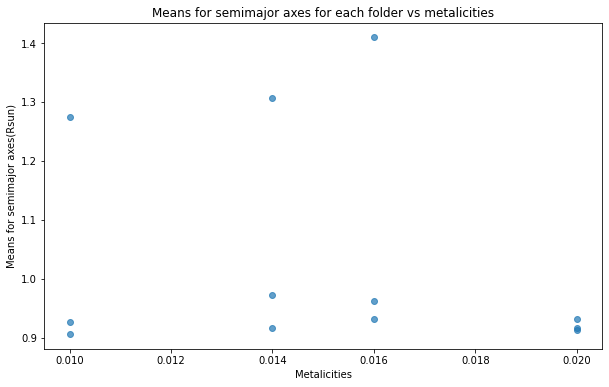

In [544]:
plt.figure(figsize=(10,6))
plt.scatter(metalicities,semim_means,alpha = 0.7)
plt.xlabel("Metalicities")
plt.ylabel("Means for semimajor axes(Rsun)")
plt.title("Means for semimajor axes for each folder vs metalicities")
plt.show()

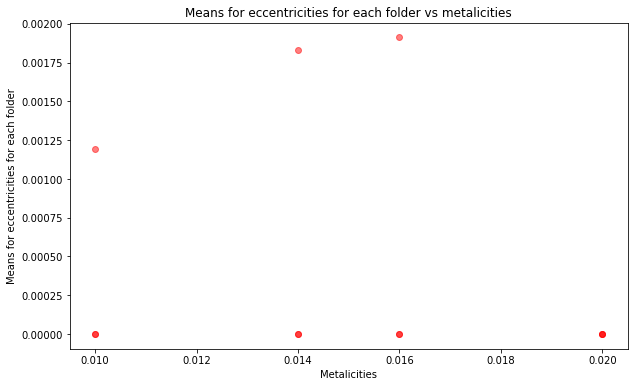

In [479]:
plt.figure(figsize=(10,6))
plt.scatter(metalicities,eccen_means,color = 'red',alpha= 0.5)
plt.xlabel("Metalicities")
plt.ylabel("Means for eccentricities for each folder")
plt.title("Means for eccentricities for each folder vs metalicities")
plt.show()

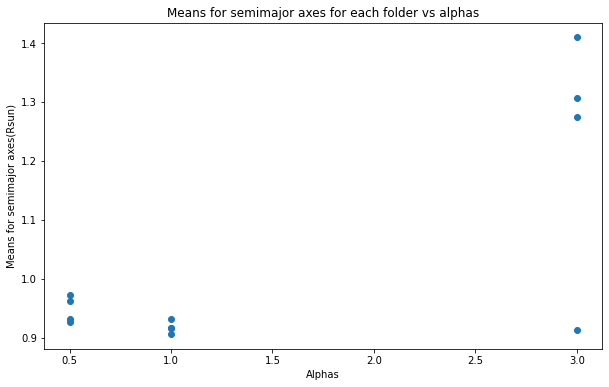

In [370]:
plt.figure(figsize=(10,6))
plt.scatter(alphas,semim_means)
plt.xlabel("Alphas")
plt.ylabel("Means for semimajor axes(Rsun)")
plt.title("Means for semimajor axes for each folder vs alphas")
plt.show()

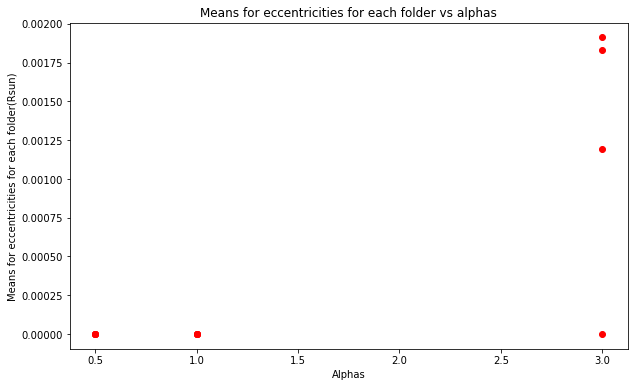

In [371]:
plt.figure(figsize=(10,6))
plt.scatter(alphas,eccen_means,color = 'red') #width = 0.05,
plt.xlabel("Alphas")
plt.ylabel("Means for eccentricities for each folder(Rsun)")
plt.title("Means for eccentricities for each folder vs alphas")
plt.show()